# Logistic Regression

In [36]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv('data/transformed_data_num.csv', index_col=0)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [39]:
data.head()

,outcometype,animaltype,sex,age,year,month,weekday,neutralized,colormix,breedmix,...,walker,weimaraner,welsh,west,wheaten,whippet,wire,wirehair,wolfhound,yorkshire
AnimalID,,,,,,,,,,,,,,,,,,,,,
0,Return_to_owner,1.0,0.0,0.090683,0.333333,0.090909,0.333333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Euthanasia,0.0,1.0,0.090683,0.000000,0.818182,1.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Adoption,1.0,0.0,0.181614,0.666667,0.000000,0.833333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Transfer,0.0,0.0,0.004997,0.333333,0.545455,0.666667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Transfer,1.0,0.0,0.181614,0.000000,0.909091,0.666667,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
data.outcometype.value_counts()

Adoption           10574
Transfer            8292
Return_to_owner     4426
Euthanasia          1304
Died                 168
Name: outcometype, dtype: int64

In [41]:
data_ml = data
data_ml = data_ml.dropna()
data_ml["outcometype"] = (data_ml["outcometype"] == "Adoption").astype(np.int) # if adopted 1 else 0
data_ml.head()

,outcometype,animaltype,sex,age,year,month,weekday,neutralized,colormix,breedmix,...,walker,weimaraner,welsh,west,wheaten,whippet,wire,wirehair,wolfhound,yorkshire
AnimalID,,,,,,,,,,,,,,,,,,,,,
0,0,1.0,0.0,0.090683,0.333333,0.090909,0.333333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,1.0,0.090683,0.000000,0.818182,1.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1.0,0.0,0.181614,0.666667,0.000000,0.833333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.004997,0.333333,0.545455,0.666667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,0.0,0.181614,0.000000,0.909091,0.666667,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


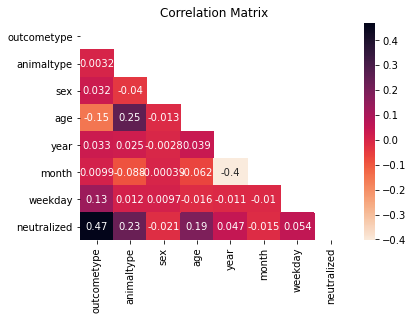

<Figure size 1152x864 with 0 Axes>

In [42]:
data_corr = data_ml[data_ml.columns[0:8]] # excluding the breed and color columns
corr_mat = data_corr.corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
cmap = sns.cm.rocket_r
sns.heatmap(corr_mat, mask = mask, cmap = cmap, annot=True)
plt.title("Correlation Matrix")
plt.figure(figsize=(16, 12))
plt.show()

From the correlation matrix we see that the most prominent predictors are whether or not an animal is neutered, the weekday of the adoption as well as the year and the sex.

<AxesSubplot:xlabel='outcometype', ylabel='count'>

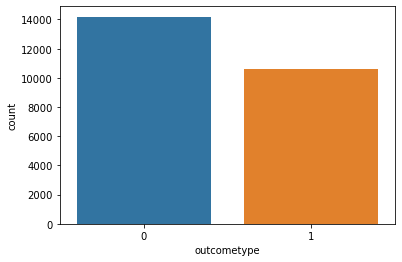

In [43]:
sns.countplot(x = "outcometype", data = data_ml) # pretty even distribution

In [30]:
y = data_ml["outcometype"]
x = data_ml.loc[:, ~data_ml.columns.isin(["outcometype"])]
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.33, random_state=42) # splitting in training & test data

In [31]:
log_reg = LogisticRegression(max_iter = 200)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [32]:
pred = log_reg.predict(x_test)

In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77      4740
           1       0.67      0.80      0.73      3433

    accuracy                           0.75      8173
   macro avg       0.75      0.75      0.75      8173
weighted avg       0.76      0.75      0.75      8173



## Confusion matrix

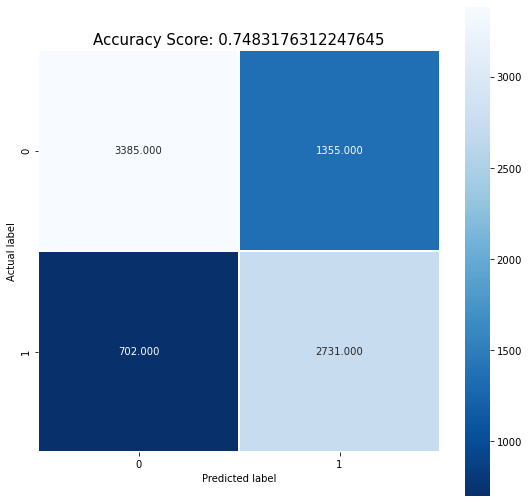

In [34]:
cm = confusion_matrix(y_test, pred)
score = log_reg.score(x_test, y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

The model still seems to have some problems with false positives - i. e. it missclassifies animals, which actually do not get adopted as adopted.

## ROC-curve

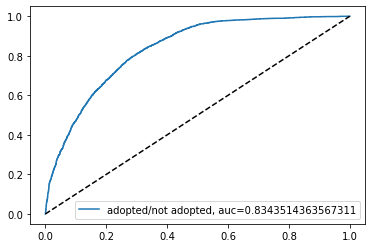

In [35]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, thresholds= metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="adopted/not adopted, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.legend(loc=4)
plt.show()